In [1]:
from tiny_gp import TinyGP, Operation
import numpy as np
TinyGP.set_java_path("java")  # set path to JVM

In [2]:
targets = list()

with open("xmxp2.dat", "r") as f:
    line = f.readline()
    varnumber, randomnumber, minrandom, maxrandom, fitnesscases = [int(s) for s in line.split()]
    for line in f:
        targets.extend([float(s) for s in line.split()])
        
targets_np = np.array(targets)
targets_np = targets_np.reshape([fitnesscases,varnumber+1])  # 101 fitness cases and 1 variable, 1 result

In [3]:
tiny_gp = TinyGP(
    constant_count=randomnumber,
    min_random=minrandom,
    max_random=maxrandom,
    operations={Operation.ADD, Operation.DIV, Operation.EXP}  # you can provide custom operation (at least one must be 2 argument function)
)
# FIXME to stop the evolution at will you have to restart the jupyter kernel 
# hist = tiny_gp.fit(targets_np, random_state=3)  # YES random_state!!!!
hist = tiny_gp.fit(targets_np)

Server started
-- TINY GP (Java version) --
SEED=-1
MAX_LEN=10000
POPSIZE=100000
DEPTH=5
CROSSOVER_PROB=0.9
PMUT_PER_NODE=0.05
MIN_RANDOM=-5.0
MAX_RANDOM=5.0
GENERATIONS=10
TSIZE=2
----------------------------------
Generation=0 Avg Fitness=4.156319394176416E41 Best Fitness=775.4560575716549 Avg Size=6.95934
Best Individual: EXP(((X1 / (EXP(1.62684858305811) / (-3.69247335914608 + 4.785084714848587))) + EXP((-0.6513031202514474 + EXP(0.40033955489275286)))))
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0,15s
Generation=1 Avg Fitness=5.64981021924505E40 Best Fitness=459.90399495197386 Avg Size=6.73754
Best Individual: ((-4.739359039959993 / (EXP((X1 / -2.978224397046535)) / (1.4986902392141674 + 1.6761507496142265))) / -3.767576861812051)
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0,16s
Generation=2 Avg Fitness=2.5969078289545656E40 Best Fitness=459.903994951

In [4]:
tiny_gp.save_json("test.json")

In [5]:
gp = tiny_gp.from_json("test.json")

In [6]:
print(hist.generation)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


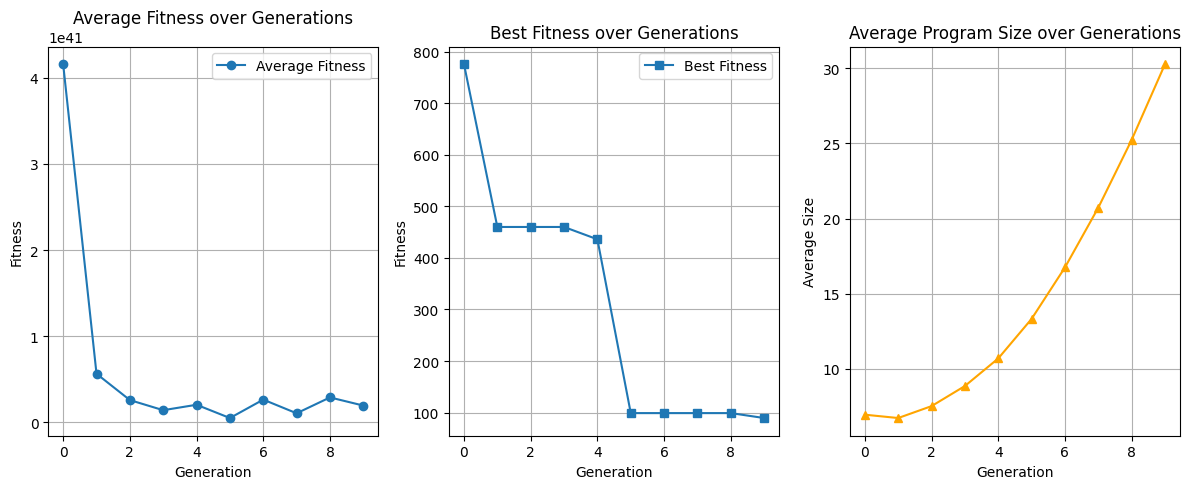

In [4]:
hist.plot()  # TODO finish this function to maybe exclude the outliers or maybe log scale?
# tiny_gp.hist.plot()  # history is also saved with the class

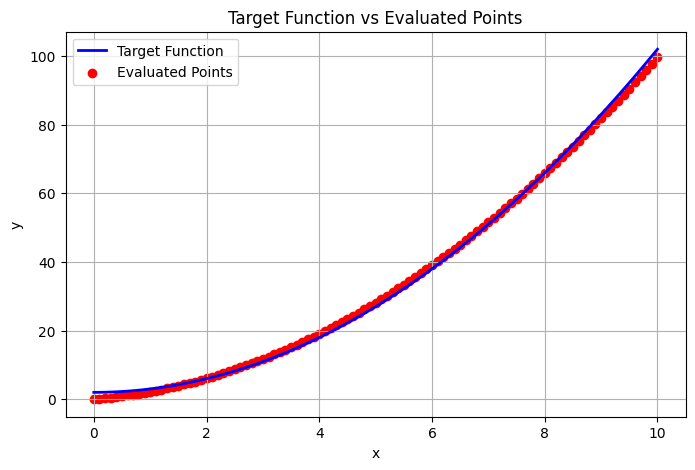

In [5]:
tiny_gp.plot()  # TODO maybe also provide error and type of fitness function?